<a href="https://colab.research.google.com/github/JraHike76/DS-Unit-1-Sprint-2-Statistics/blob/master/module3/Jay%20Adamo-Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 123

## Introduction to Bayesian Inference




## Assignment - Code it up!

We used pure math to apply Bayes Theorem to drug tests. Now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up.

Specific goals/targets:

### 1) Write a function 

`def prob_drunk_given_positive(prob_drunk_prior, false_positive_rate, true_positive_rate):` 

You should only truly need these two values in order to apply Bayes Theorem. In this example, imagine that individuals are taking a breathalyzer test with an 8% false positive rate, a 100% true positive rate, and that our prior belief about drunk driving in the population is 1/1000. 
 - What is the probability that a person is drunk after one positive breathalyzer test?
 - What is the probability that a person is drunk after two positive breathalyzer tests?
 - How many positive breathalyzer tests are needed in order to have a probability that's greater than 95% that a person is drunk beyond the legal limit?

### 2) Explore `scipy.stats.bayes_mvs`  
Read its documentation, and experiment with it on data you've tested in other ways earlier this week.
 - Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach. (with a large sample size they should look close to identical, however, take this opportunity to practice visualizing condfidence intervals in general. The following are some potential ways that you could visualize confidence intervals on your graph:
  - [Matplotlib Error Bars](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
  - [Seaborn barplot with error bars](https://seaborn.pydata.org/generated/seaborn.barplot.html)
  - [Vertical ines to show bounds of confidence interval](https://www.simplypsychology.org/confidence-interval.jpg)
  - [Confidence Intervals on Box Plots](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

### 3) In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/).



## 1) Write a function

In [0]:
# Prior Probability
p_infected = .005
# True Positive Rate
p_pos_infected = 1
# False Positive Rate
p_pos_not_infected = .01
# Complement Prior
p_not_infected = 1 - p_infected

numerator = p_pos_infected*p_infected

denominator = p_pos_infected*p_infected + p_pos_not_infected*p_not_infected

posterior_probability = numerator / denominator

print(posterior_probability)

0.33444816053511706


In [0]:
# What is the probability that a person is drunk after two positive breathalyzer tests?

def prob_drunk_given_pos(prior, true_positive, false_positive):
  numerator = true_positive*prior
  denominator = (true_positive*prior + false_positive*(1-prior))
  posterior = numerator / denominator
  return posterior
  
first_posterior = prob_drunk_given_pos(1/1000, 1, .08)

In [0]:
second_posterior = prob_drunk_given_pos(first_posterior, 1, .08)

In [0]:
probabilities = []

prior = 1/1000
true_positive = 1
false_positive = .08

for test in range(1,11):
  prior = prob_drunk_given_pos(prior, true_positive, false_positive)
  probabilities.append(prior) 

probabilities

[0.012357884330202669,
 0.13525210993291495,
 0.6615996951348605,
 0.9606895076105054,
 0.9967371577896734,
 0.9997381867081508,
 0.9999790498904363,
 0.9999983239589307,
 0.9999998659165077,
 0.9999999892733192]

## 2) Explore scipy.stats.bayes_mvs

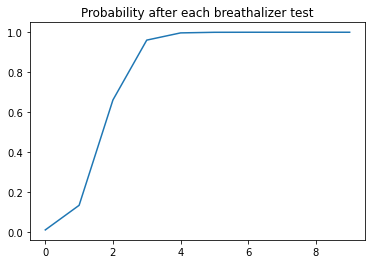

In [0]:
# Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bayes_mvs.html

import matplotlib.pyplot as plt

plt.plot(probabilities)
plt.title("Probability after each breathalizer test")
plt.show()


In [0]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv", na_values=' ?')

print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
df['age'].mean()

38.58164675532078

In [0]:
sample = df.sample(1000)

In [0]:
sample['age'].mean()

38.703

In [0]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  # pass extra parameter (ddof=1) to calculate **sample** standard deviation
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # Lookup the t-statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom: 49
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean - margin_of_error, mean, mean + margin_of_error)

In [0]:
# Frequentist confidence_interval
frequentist = confidence_interval(sample['age'])
frequentist

(38.30095823005292, 39.145, 39.989041769947086)

In [0]:
# Bayesian confidence_interval
bayesian, _, _ = stats.bayes_mvs(sample['age'], alpha=.95)
bayesian

Mean(statistic=39.145, minmax=(38.30095823005292, 39.989041769947086))

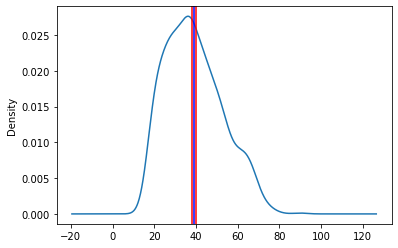

In [0]:
sample['age'].plot.density()
plt.axvline(frequentist[0], color='red')
plt.axvline(frequentist[1], color='blue')
plt.axvline(frequentist[2], color='red')
plt.show()

In [0]:
bayesian.statistic
bayesian.minmax[1]
bayesian.minmax[0]

bayesian.minmax[1] - bayesian.minmax[0]

1.6880835398941656

In [0]:
(frequentist[2]-frequentist[1])

0.8440417699470828

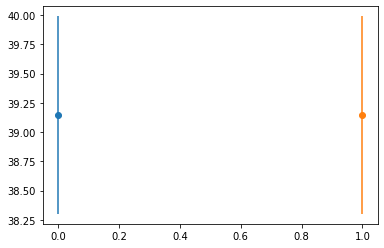

In [0]:
plt.errorbar(x=0, y=frequentist[1], yerr=(frequentist[2]-frequentist[1]), fmt='o')
plt.errorbar(x=1, y=bayesian.statistic, yerr=(bayesian.minmax[1]-bayesian.statistic), fmt='o')
plt.show()

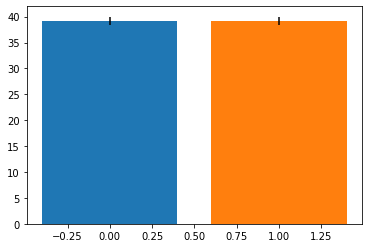

In [0]:
plt.bar(x=0, height=frequentist[1], yerr=(frequentist[2]-frequentist[1]))
plt.bar(x=1, height=bayesian.statistic, yerr=(bayesian.minmax[1]-bayesian.statistic))
plt.show()

## 3) In your own words, summarize the difference between Bayesian and Frequentist statistics



In [0]:
# Bayesian statistics uses prior knowledge, repeated testing, and takes in account all new evidence to interpret the probability or outcome. 
# Frequentist statistics draw conclusions from testing a data sample representative of a population and focuses on the mean or most frequent occurence. 


- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)

## Stretch Goals:

- Go back and study the content from Modules 1 & 2 to make sure that you're really comfortable with them.
- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!